# **Análise e Visualização de Dados**

Dataset:
Pima Indians Diabetes Database

URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd

dataset_original = pd.read_csv('diabetes.csv', sep =',')
print("\n5-number summary")

dataset_original.describe()


5-number summary


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
import numpy as np

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
'BMI']:
  dataset_original[col] = dataset_original[col].replace(0,np.nan)

<ipython-input-4-4a8865a718e3>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset_original.hist(ax = ax)


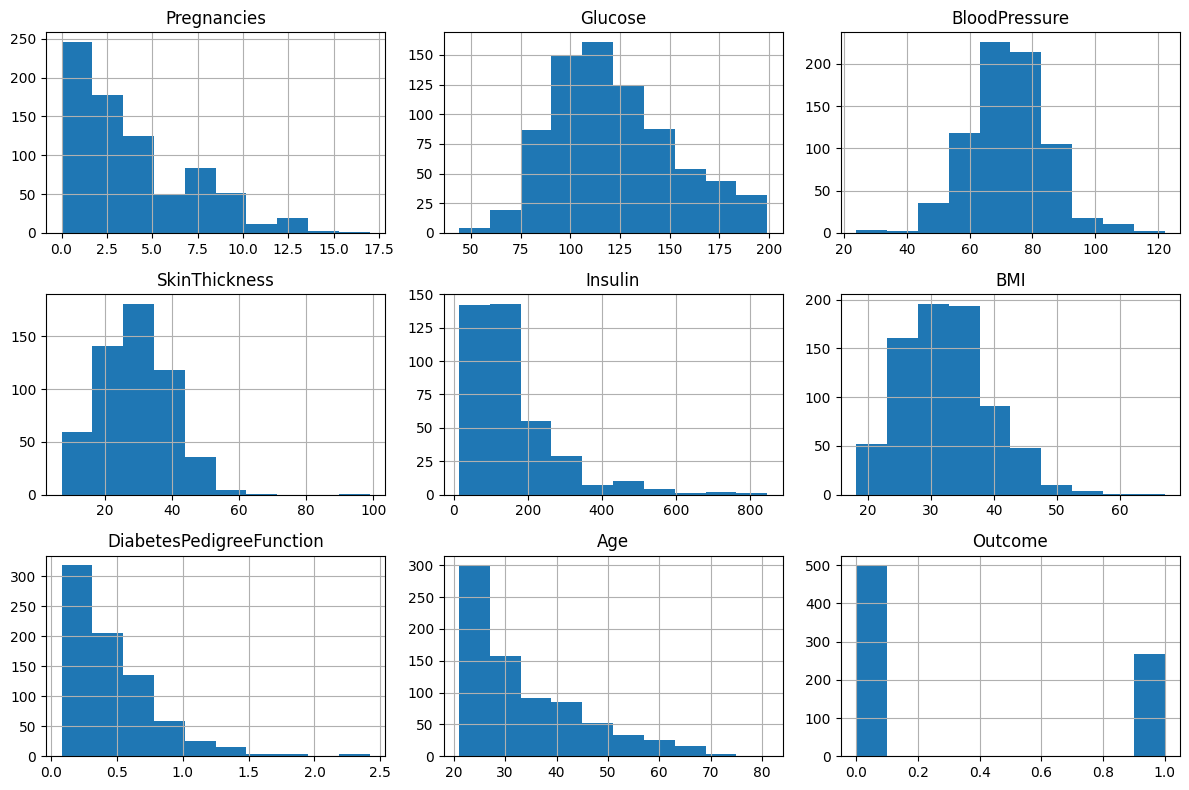

In [4]:

import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (12,8))

# Passando o ax para o hist, forçamos que o pandas plote na área 12x8 (área maior que o padrão)
# se não passarmos a figura vai ficar pequena
dataset_original.hist(ax = ax)

plt.tight_layout()
plt.show()

In [5]:
dataset_removido = dataset_original.dropna() # Linhas com NaN vão ser removidas«
dataset_imputado = dataset_original.copy() # Copiando original para imputar depois
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
'BMI']:
  mediana = dataset_imputado[col].median()
  dataset_imputado[col] = dataset_imputado[col].fillna(mediana)
  print('substituindo valores faltando na coluna %s por %f' % (col, mediana))

print('\nDataset com imputação: %d amostras e %d colunas' % dataset_imputado.shape)
print('Dataset com remoção: %d amostras e %d colunas' % dataset_removido.shape)

substituindo valores faltando na coluna Glucose por 117.000000
substituindo valores faltando na coluna BloodPressure por 72.000000
substituindo valores faltando na coluna SkinThickness por 29.000000
substituindo valores faltando na coluna Insulin por 125.000000
substituindo valores faltando na coluna BMI por 32.300000

Dataset com imputação: 768 amostras e 9 colunas
Dataset com remoção: 392 amostras e 9 colunas


<ipython-input-6-c9becdece338>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset_imputado.hist(ax = ax)


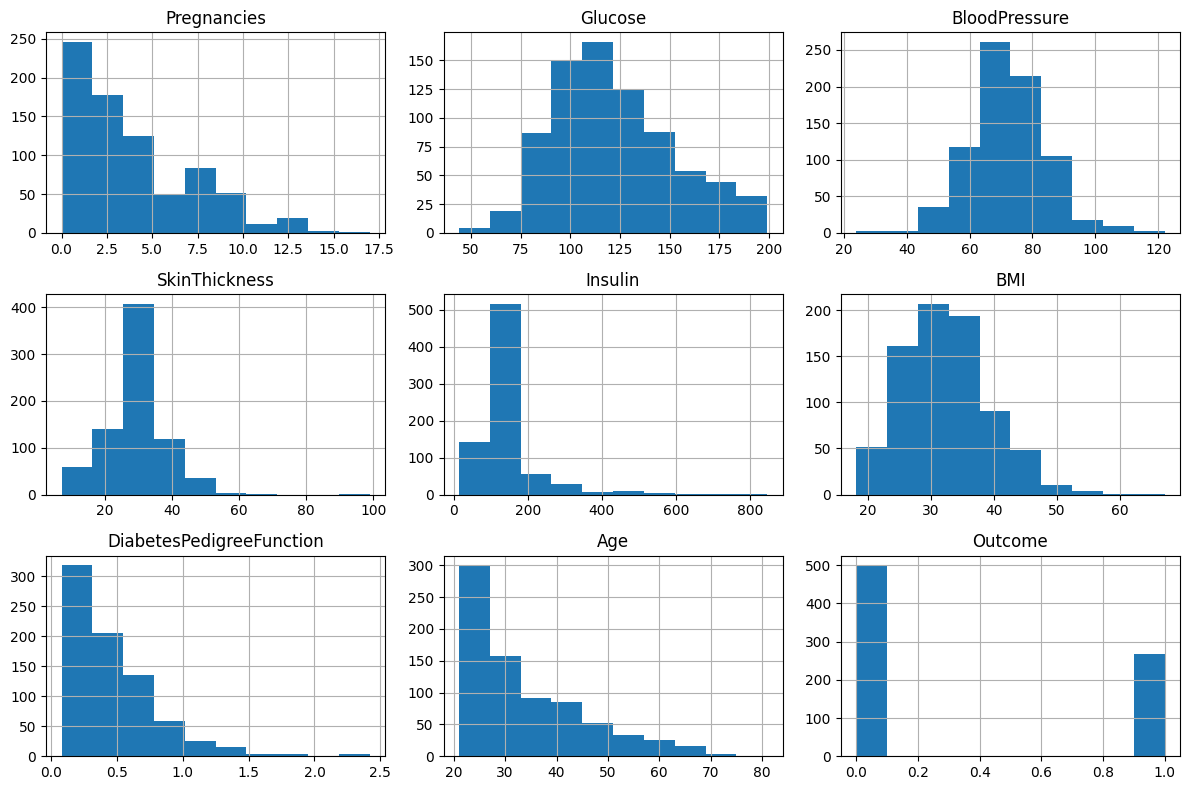

In [6]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (12,8))
dataset_imputado.hist(ax = ax)

plt.tight_layout()
plt.show();

In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Separando em atributos e desfecho
X = dataset_imputado.loc[:,dataset_imputado.columns != 'Outcome']
y = dataset_imputado['Outcome']

Xb, yb = RandomUnderSampler().fit_resample(X,y)

# Criação do dataset balanceado agrupando novamente as colunas
dataset_balanceado = pd.DataFrame(Xb, columns = dataset_imputado.columns[:-1])
dataset_balanceado["Outcome"] = yb

print('Dataset com imputação: %d amostras e %d colunas'% dataset_imputado.shape)
print('Dataset com imputação balanceado: %d amostras e %d colunas'% dataset_balanceado.shape)

Dataset com imputação: 768 amostras e 9 colunas
Dataset com imputação balanceado: 536 amostras e 9 colunas


In [8]:
from scipy.stats import shapiro
from scipy.stats import normaltest
for col in dataset_balanceado.columns[:-1]:
  stat, p = normaltest(dataset_balanceado[col])
  #print('Statistics=%.3f, p=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha: # H0: a distribuição é normal
    print('Distribuição %s parece Gaussiana (falha ao rejeitarH0)' % (col))
  else:
    print('Distribuição %s não parece Gaussiana (rejeita H0)' % (col))  

Distribuição Pregnancies não parece Gaussiana (rejeita H0)
Distribuição Glucose não parece Gaussiana (rejeita H0)
Distribuição BloodPressure não parece Gaussiana (rejeita H0)
Distribuição SkinThickness não parece Gaussiana (rejeita H0)
Distribuição Insulin não parece Gaussiana (rejeita H0)
Distribuição BMI não parece Gaussiana (rejeita H0)
Distribuição DiabetesPedigreeFunction não parece Gaussiana (rejeita H0)
Distribuição Age não parece Gaussiana (rejeita H0)


Distribuição Pregnancies não parece Gaussiana (rejeita H0), group NEG
Distribuição Pregnancies não parece Gaussiana (rejeita H0), group POS
Distribuição Glucose não parece Gaussiana (rejeita H0), group NEG
Distribuição Glucose não parece Gaussiana (rejeita H0), group POS
Distribuição BloodPressure não parece Gaussiana (rejeita H0), group NEG
Distribuição BloodPressure não parece Gaussiana (rejeita H0), group POS
Distribuição SkinThickness parece Gaussiana (falha ao rejeitar H0), group NEG
Distribuição SkinThickness não parece Gaussiana (rejeita H0), group POS
Distribuição Insulin não parece Gaussiana (rejeita H0), group NEG
Distribuição Insulin não parece Gaussiana (rejeita H0), group POS
Distribuição BMI não parece Gaussiana (rejeita H0), group NEG
Distribuição BMI não parece Gaussiana (rejeita H0), group POS
Distribuição DiabetesPedigreeFunction não parece Gaussiana (rejeita H0), group NEG
Distribuição DiabetesPedigreeFunction não parece Gaussiana (rejeita H0), group POS
Distribuição

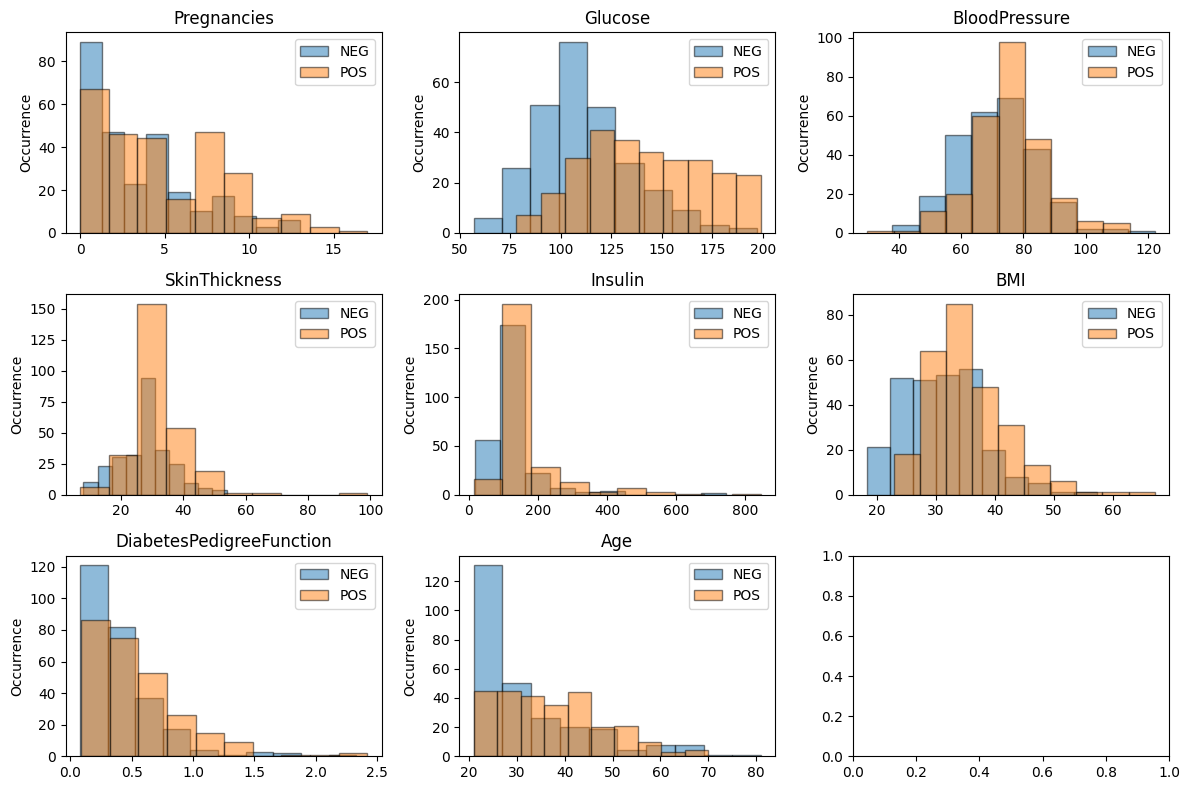

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import anderson

fig,axes = plt.subplots(3,3,figsize = (12,8))

i = j = 0
for idx, col in enumerate(dataset_balanceado.columns[:-1]):
  # Grupo 0: Casos NEGATIVOS (NEG)
  tmp0 = dataset_balanceado.loc[dataset_balanceado.Outcome == 0,col]
  # Grupo 1: Casos POSITIVOS (POS)
  tmp1 = dataset_balanceado.loc[dataset_balanceado.Outcome == 1,col]

  stat, p = normaltest(tmp0)
  alpha = 0.05
  if p > alpha:
    print('Distribuição %s parece Gaussiana (falha ao rejeitar H0), group NEG' % (col))
  else:
    print('Distribuição %s não parece Gaussiana (rejeita H0), group NEG' % (col))

  stat, p = normaltest(tmp1)
  alpha = 0.05
  if p > alpha:
    print('Distribuição %s parece Gaussiana (falha ao rejeitar H0), group POS' % (col))
  else:
    print('Distribuição %s não parece Gaussiana (rejeita H0), group POS' % (col))


  i = idx / 3
  j = idx % 3


  axes[int(i)][j].hist(tmp0, label ='NEG', alpha = 0.5, lw = 1,edgecolor='black')
  axes[int(i)][j].hist(tmp1, label = 'POS', alpha = 0.5, lw = 1,edgecolor='black')
  axes[int(i)][j].set_title(col)
  axes[int(i)][j].set_ylabel('Occurrence')
  axes[int(i)][j].legend()

plt.tight_layout()
plt.show();

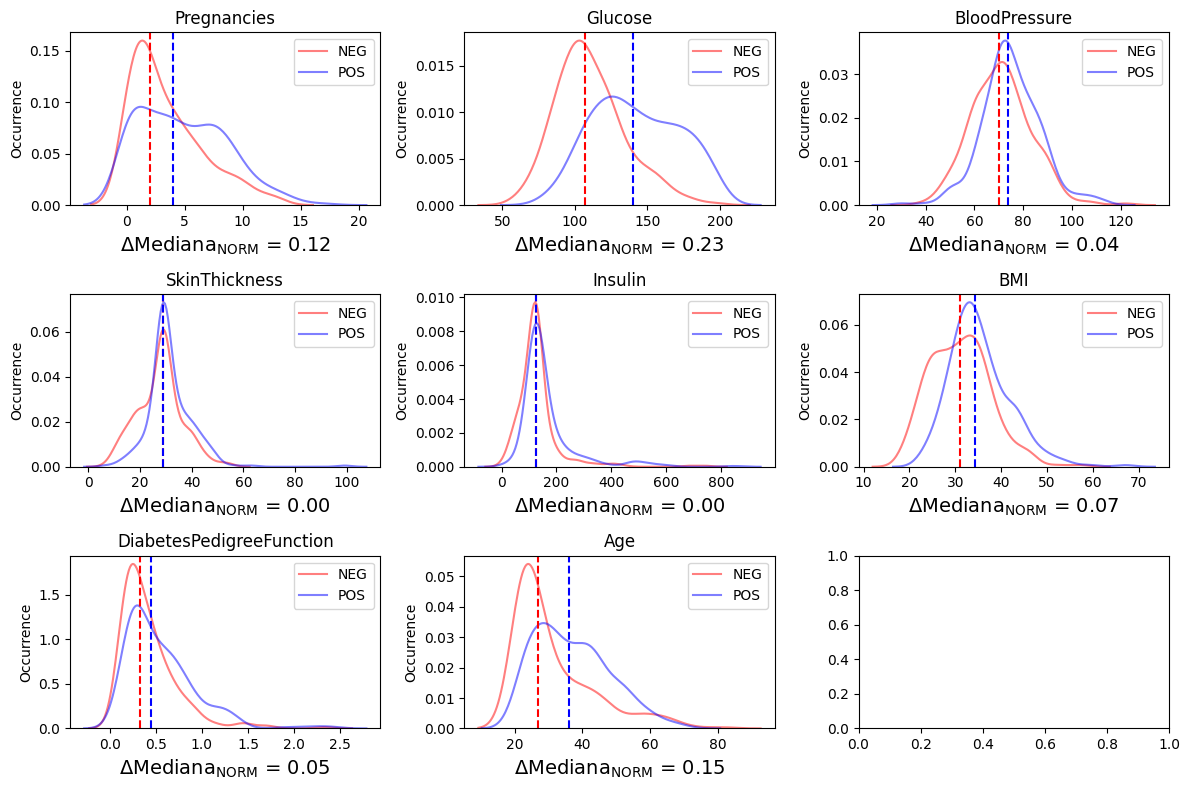

In [11]:
import seaborn as sns

fig,axes = plt.subplots(3,3,figsize = (12,8))

i = j = 0

for idx, col in enumerate(dataset_balanceado.columns[:-1]):
  tmp0 = dataset_balanceado.loc[dataset_balanceado.Outcome == 0,col]
  tmp1 = dataset_balanceado.loc[dataset_balanceado.Outcome == 1,col]

  i = idx / 3
  j = idx % 3

  sns.kdeplot(tmp0, ax = axes[int(i)][j], label ='NEG', alpha = 0.5,c='r')
  sns.kdeplot(tmp1,ax = axes[int(i)][j], label ='POS', alpha = 0.5,c='b')

  median0 = tmp0.median()
  median1 = tmp1.median()

  #Plotagem com a função axvline(x = mediana)
  axes[int(i)][j].axvline(x=median0,c='r', linestyle='--')
  axes[int(i)][j].axvline(x=median1,c='b', linestyle='--')

  axes[int(i)][j].set_title(col)
  axes[int(i)][j].set_ylabel('Occurrence')
  axes[int(i)][j].legend()

  # Adicionando uma caixinha com a distância entre as medianas
  # Normalizar para interpretar a distância independente da escala
  diff_med = abs(median0 - median1)
  min_val = dataset_balanceado[col].min()
  max_val = dataset_balanceado[col].max()
  diff_med_norm = (diff_med)/(max_val - min_val)

  axes[int(i)][j].set_xlabel(r'$\Delta$Mediana$_{\mathrm{NORM}}$ = %.2f' % (diff_med_norm), fontsize=14)

plt.tight_layout()
plt.show();

<ipython-input-12-0b0a6ac45230>:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  p0 = sns.kdeplot(x='Age', y='Glucose', data=dataset_balanceado, ax = axes, hue ='Outcome', alpha = 1, legend=True, bw=0.5)


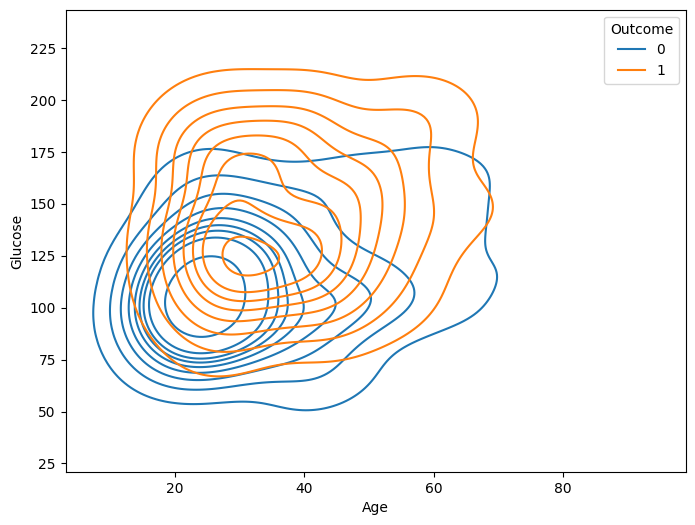

In [12]:
import scipy

fig,axes = plt.subplots(figsize = (8,6))

tmp0 = dataset_balanceado.loc[dataset_balanceado.Outcome == 0, ['Age', 'Glucose']]
tmp1 = dataset_balanceado.loc[dataset_balanceado.Outcome == 1, ['Age', 'Glucose']]

p0 = sns.kdeplot(x='Age', y='Glucose', data=dataset_balanceado, ax = axes, hue ='Outcome', alpha = 1, legend=True, bw=0.5)
#p1 = sns.kdeplot(x='Age', y='Glucose', data=tmp1, ax = axes, label ='POS', alpha = 1, legend=True, bw=0.5)

# gambiarras para deixar a legnda na cor certa
#axes.legend()
#leg = axes.get_legend()
#leg.legendhandles[0].set_color('blue')
#leg.legendhandles[1].set_color('red')

plt.show()

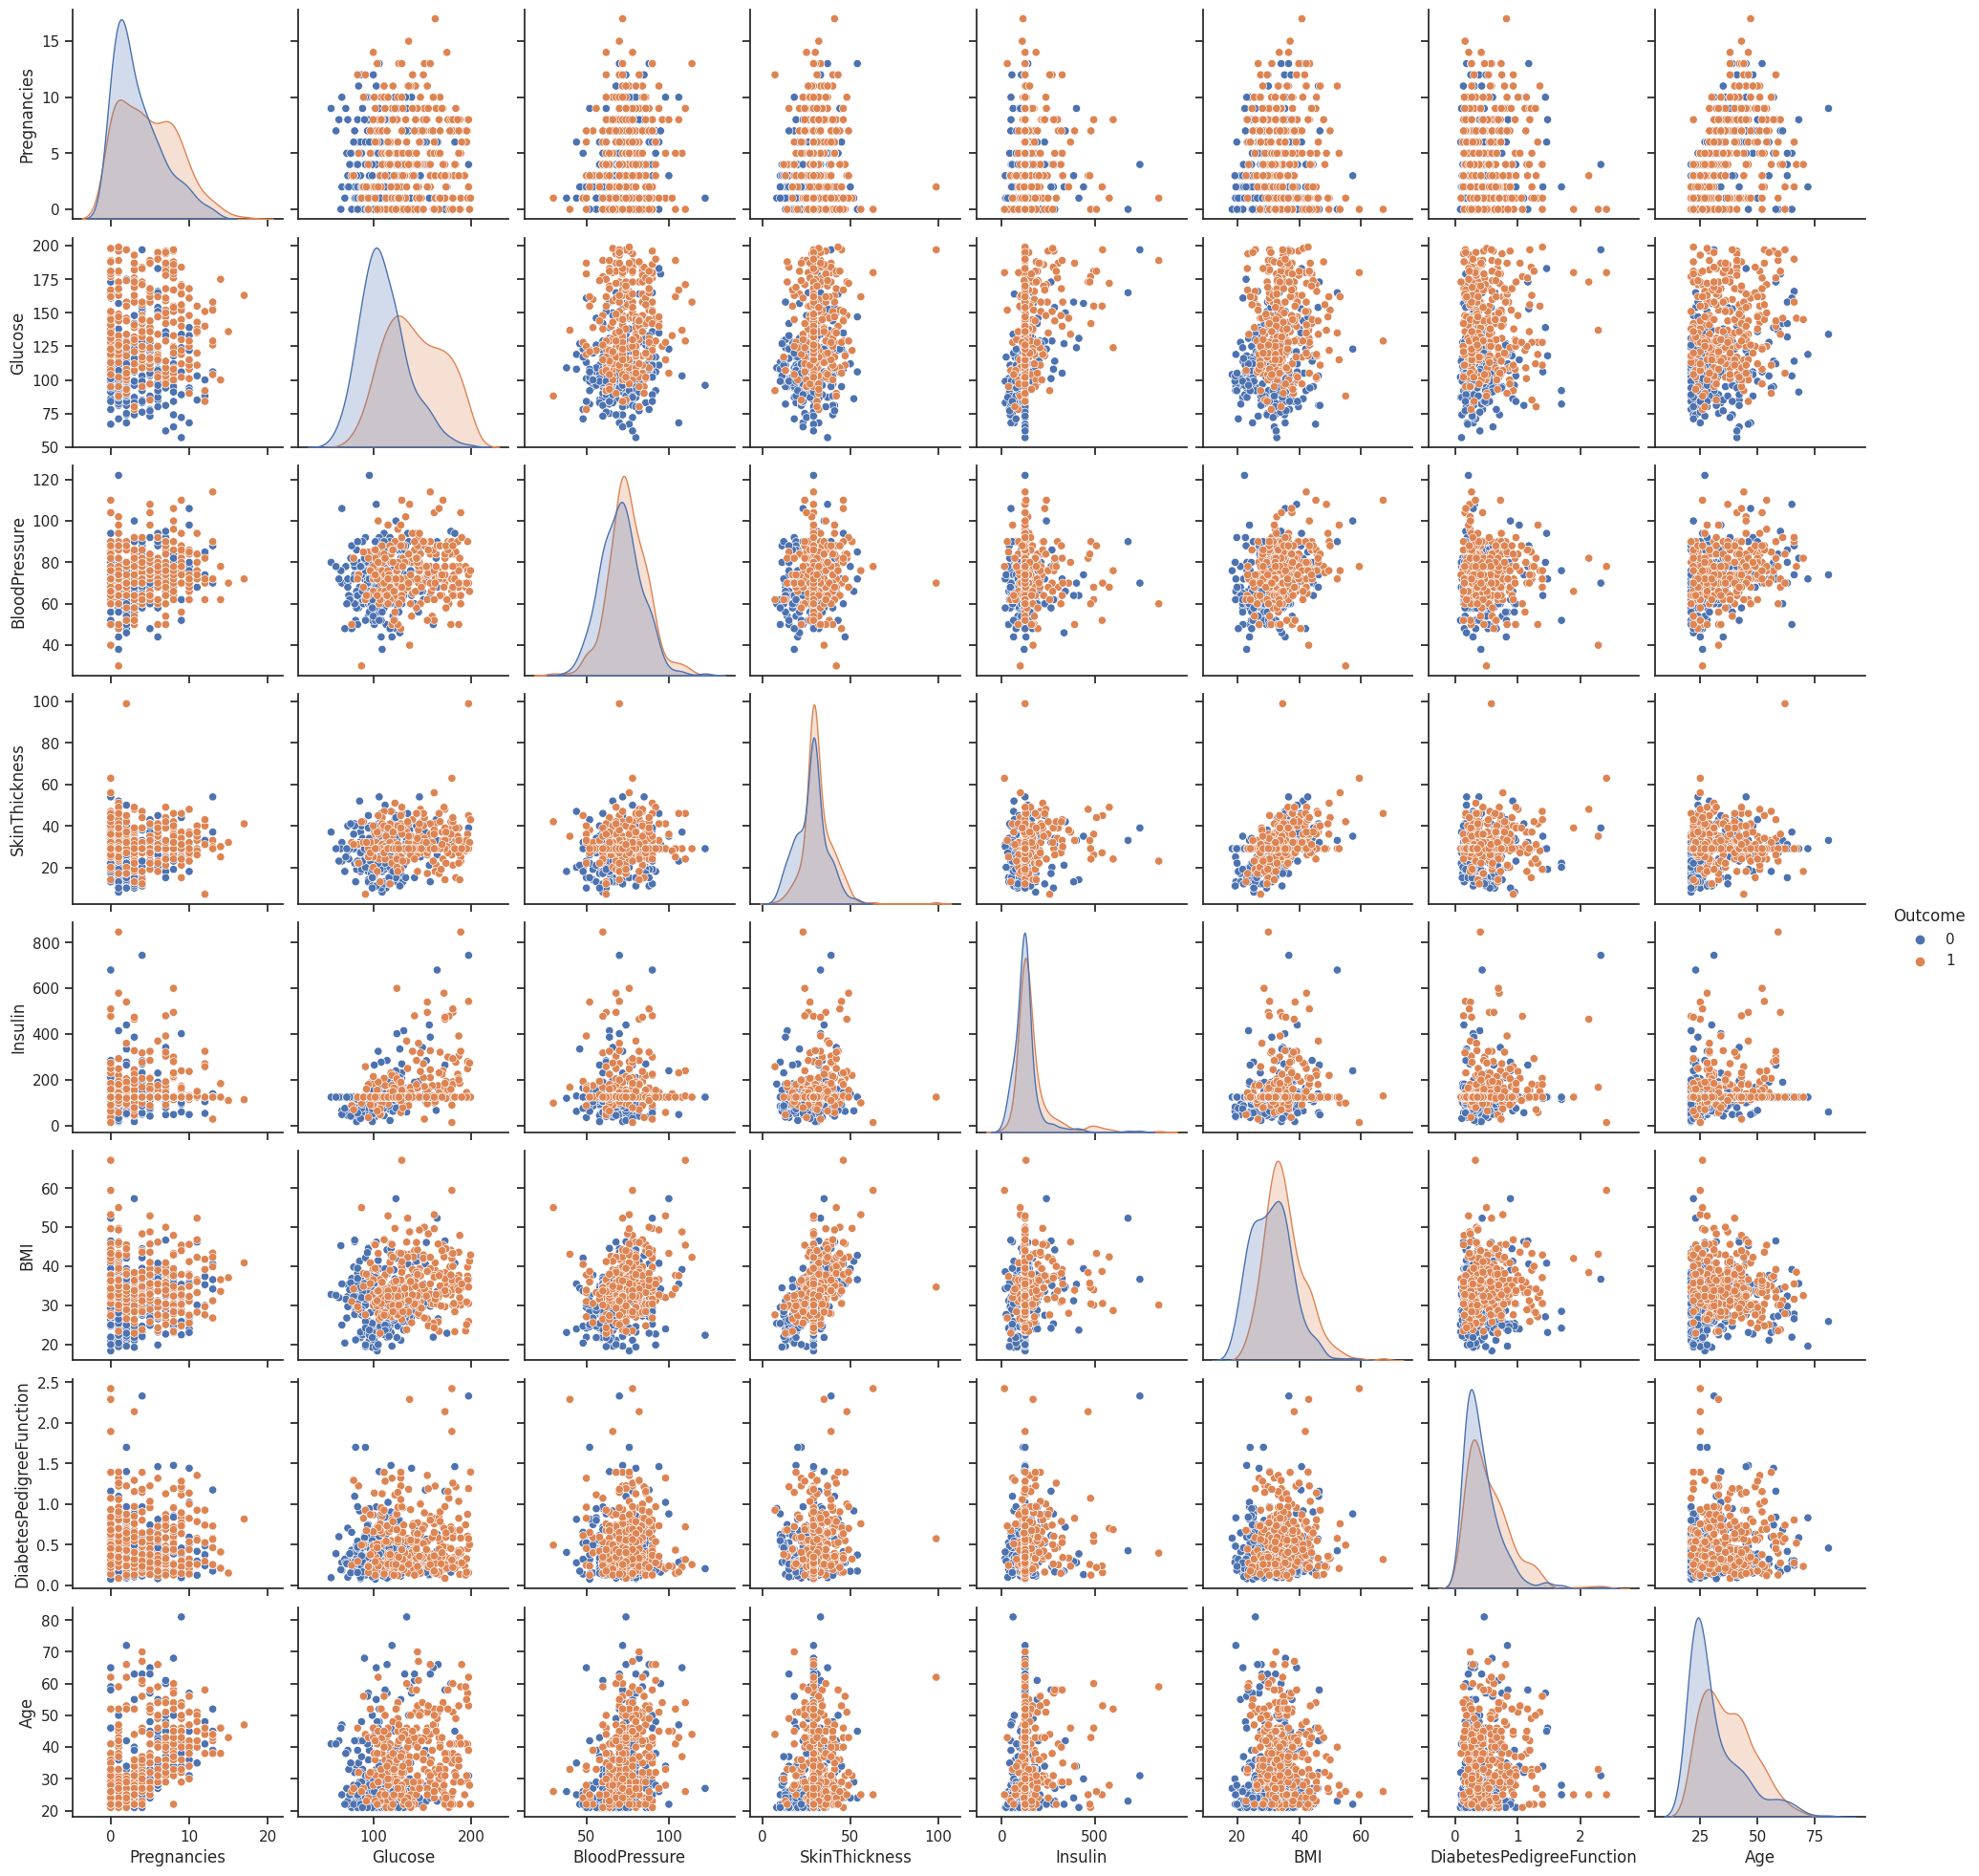

In [13]:
sns.set(style="ticks")

attributes = dataset_balanceado.columns.drop("Outcome")
sns.pairplot(dataset_balanceado, hue="Outcome", vars=attributes)

In [14]:
def bmi_cat(x):
  if x < 18.5:
    return 0 #'underweight'
  if 18.5 <= x and x < 25:
    return 1 #'normal weight'
  if 25 <= x and x < 30:
    return 2 #'overweight'
  if 30 <= x and x < 35:
    return 3 #'obesity I'
  if 35 <= x and x <= 40:
    return 4 #'obesity II'
  else:
    return 5 #'obesity III'

dataset_balanceado['BMI_cat'] = dataset_balanceado['BMI'].apply(bmi_cat)

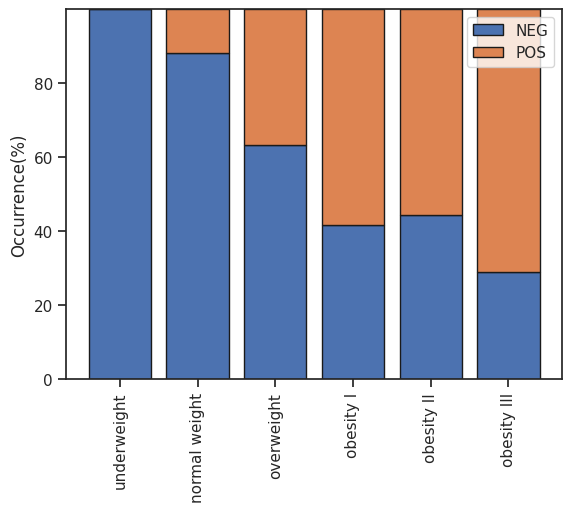

In [15]:
tmp0 = dataset_balanceado.loc[dataset_balanceado.Outcome == 0, 'BMI_cat']
tmp1 = dataset_balanceado.loc[dataset_balanceado.Outcome == 1, 'BMI_cat']

vals = ['underweight', 'normal weight','overweight', 'obesity I', 'obesity II', 'obesity III']
counts0 = []
counts1 = []
# para cada valor de BMI_cat
for val in range(0,6):
  # total de valores V para o grupo NEG
  count0 = np.sum(tmp0 == val)
  # total de valores V para o grupo POS
  count1 = np.sum(tmp1 == val)
  # total de valores V para os dois grupos + um valorm mto pequeno para não dar erro na divisão
  total = float(np.sum(dataset_balanceado['BMI_cat'] == val))+0.00001

  counts0.append(count0/total*100)
  counts1.append(count1/total*100)

plt.bar(range(len(vals)), counts0, label = 'NEG', lw = 1, edgecolor= 'k')
plt.bar(range(len(vals)), counts1, bottom = counts0, label = 'POS',lw = 1, edgecolor= 'k')
plt.xticks(range(len(vals)), vals, rotation = 90)
plt.legend()
plt.ylabel('Occurrence(%)')
plt.show()

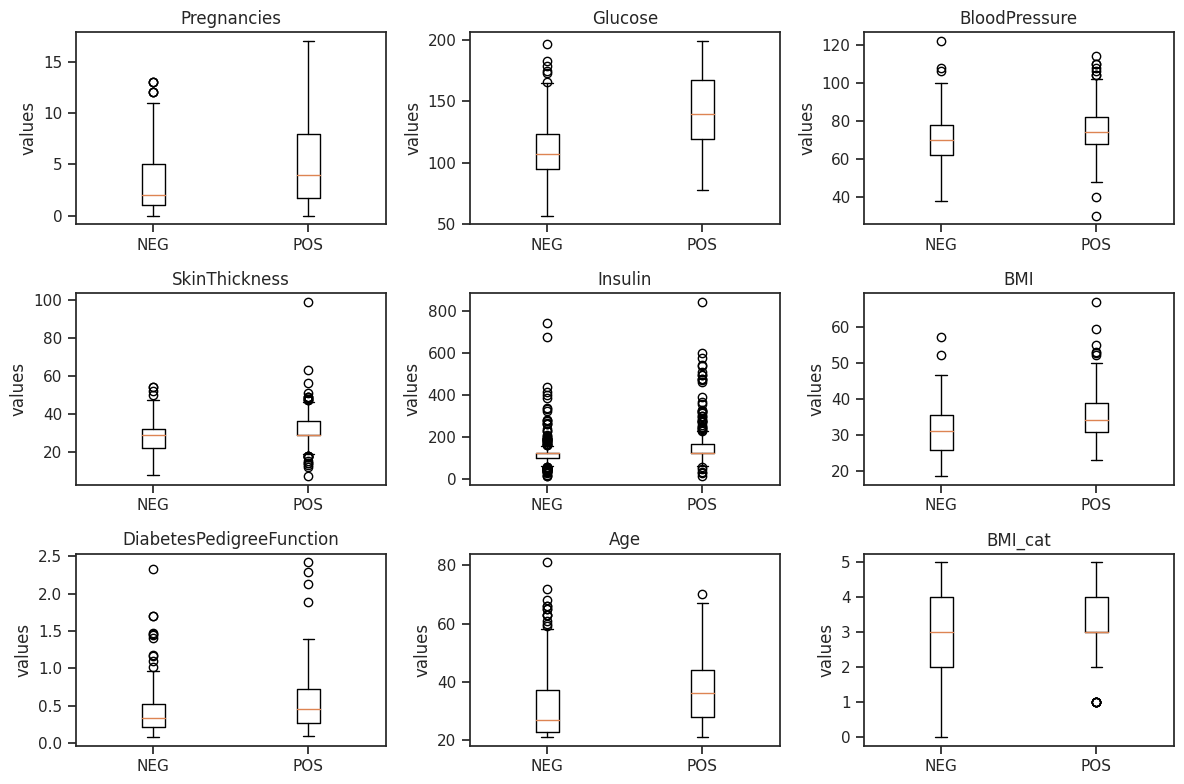

In [16]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(3,3,figsize = (12,8))

i = j = 0
idx = 0
for col in dataset_balanceado.columns:
  if col == 'Outcome': continue
  tmp0 = dataset_balanceado.loc[dataset_balanceado.Outcome == 0,col]
  tmp1 = dataset_balanceado.loc[dataset_balanceado.Outcome == 1,col]

  i = idx / 3
  j = idx % 3
  idx += 1

  axes[int(i)][j].boxplot([tmp0, tmp1])
  axes[int(i)][j].set_title(col)
  axes[int(i)][j].set_xticklabels(['NEG','POS'])
  axes[int(i)][j].set_ylabel('values')

plt.tight_layout()
plt.show();

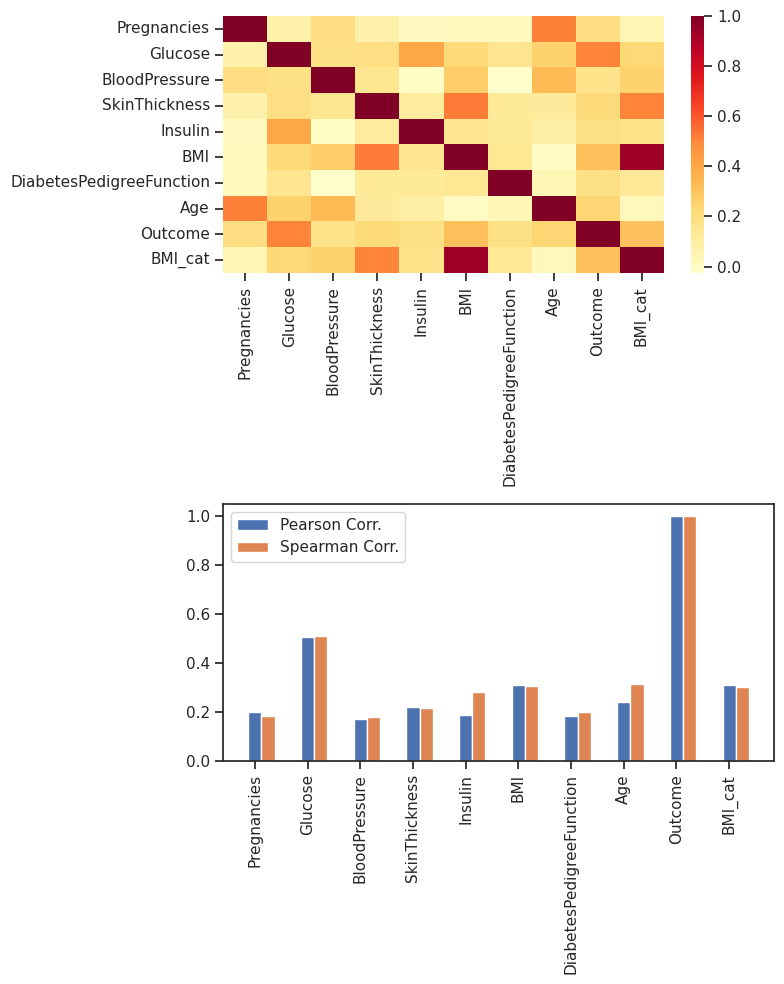

In [19]:
import seaborn as sns

fig, axes = plt.subplots(2,1,figsize=(8,10))

# Plotando as correlações entre atributos usando Pearson
sns.heatmap(dataset_balanceado.corr(), cmap = 'YlOrRd', ax = axes[0])

corr_pearson_vet = []
corr_spearman_vet = []

# Percorrerendo todas as colunas para calcular Spearman em cada caso
for col in dataset_balanceado.columns:
  corr_pearson = dataset_balanceado[col].corr(dataset_balanceado['Outcome'], method = "pearson")
  corr_spearman = dataset_balanceado[col].corr(dataset_balanceado['Outcome'], method = "spearman")
  corr_pearson_vet.append(corr_pearson)
  corr_spearman_vet.append(corr_spearman)

# Plotando as barras com as correlações de Pearson e Speaman
axes[1].bar(np.arange(len(corr_pearson_vet)),corr_pearson_vet, width=0.25, label = "Pearson Corr.")
axes[1].bar(np.arange(len(corr_spearman_vet))+0.25,corr_spearman_vet, width=0.25, label = "Spearman Corr.")

# Renomeando rótulos do eixo X e colocando o nome dos nossos atributos
axes[1].set_xticks(range(dataset_balanceado.columns.shape[0]))
axes[1].set_xticklabels(dataset_balanceado.columns, rotation=90)

axes[1].legend()

plt.tight_layout()
plt.show()

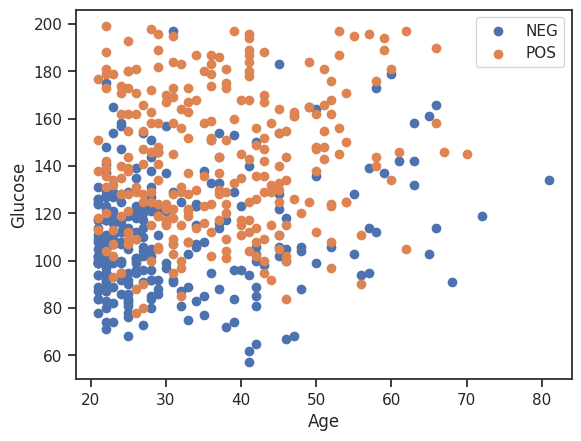

In [20]:
tmp0 = dataset_balanceado.loc[dataset_balanceado.Outcome == 0 ]
tmp1 = dataset_balanceado.loc[dataset_balanceado.Outcome == 1 ]

plt.scatter(tmp0['Age'],tmp0['Glucose'], label = 'NEG' )
plt.scatter(tmp1['Age'],tmp1['Glucose'], label = 'POS' )

plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

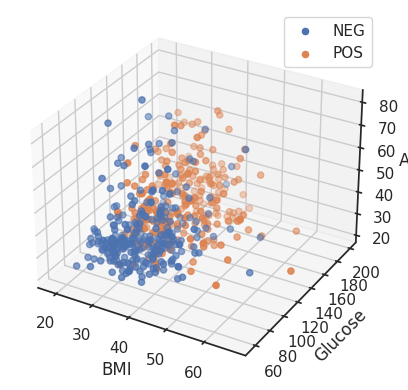

In [21]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

tmp0 = dataset_balanceado.loc[dataset_balanceado.Outcome == 0 ]
tmp1 = dataset_balanceado.loc[dataset_balanceado.Outcome == 1 ]

ax.scatter(tmp0['BMI'],tmp0['Glucose'], tmp0['Age'], label = 'NEG')
ax.scatter(tmp1['BMI'],tmp1['Glucose'], tmp1['Age'], label = 'POS')

ax.set_xlabel('BMI')
ax.set_ylabel('Glucose')
ax.set_zlabel('Age')

plt.legend()
plt.show()

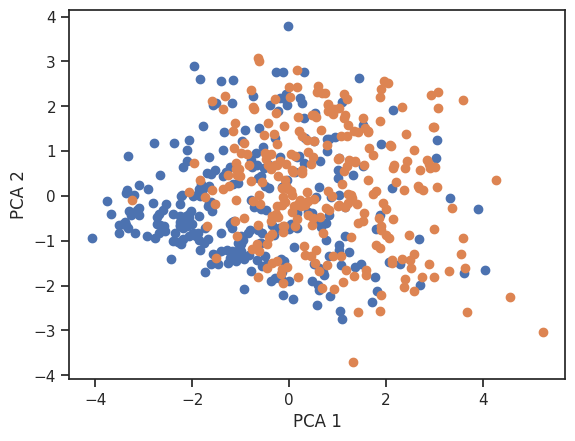

In [22]:
from sklearn.decomposition import PCA

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)

X = dataset_balanceado.loc[:,dataset_balanceado.columns != 'Outcome']
y = dataset_balanceado['Outcome']

from sklearn.preprocessing import StandardScaler
Xscale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca = pca.fit(Xscale)
Xtr = pca.transform(Xscale)

Xtr0 = Xtr[y==0,:]
Xtr1 = Xtr[y==1,:]

ax.scatter(Xtr0[:,0],Xtr0[:,1], label = 'NEG' )
ax.scatter(Xtr1[:,0],Xtr1[:,1], label = 'POS' )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

plt.show()

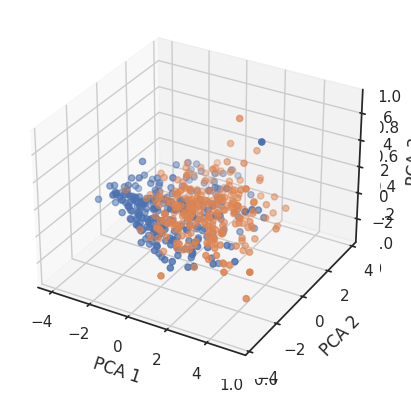

In [23]:
%matplotlib inline

from sklearn.decomposition import PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pca = PCA(n_components=3)
pca = pca.fit(Xscale)
Xtr = pca.transform(Xscale)

ax = fig.add_subplot(111, projection='3d')

Xtr0 = Xtr[y==0,:]
Xtr1 = Xtr[y==1,:]

ax.scatter(Xtr0[:,0],Xtr0[:,1], Xtr0[:,2], label = 'NEG' )
ax.scatter(Xtr1[:,0],Xtr1[:,1], Xtr1[:,2], label = 'POS' )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()